## Data Loading and EDA

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, auc, accuracy_score, roc_auc_score, f1_score, classification_report, roc_curve

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

rand = 10

In [2]:
from IPython.display import display, HTML

display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
train_df = pd.read_csv('train_data.csv', index_col = [0])

In [4]:
train_df

,days_90_queries,flag_zpexp,ageolddate_f7,f41_my,age2,f39_my,active_crd_amount_to_limit,sumlastvalue_7_f50,avg_active_credit_limit,total_amount,...,agelifelastterm_f29,cntstartcntr_3_f75,closedel_12_f95,max_active_crd_res_amount_to_limit,active_number_of_outstanding_instalments,value_cr_card_contract,final_resincome,f8,inst_credit_cnt,target
0,4.0,0,26.0,NaN,25.0,12.0,NaN,6017.76,NaN,240379.25,...,15.0,0.0,0.0,NaN,NaN,0.0,12.111597,0.000,NaN,0
1,2.0,0,101.0,NaN,31.0,NaN,0.654416,NaN,360000.0,50938389.00,...,26.0,0.0,0.0,0.942823,257.0,0.0,13.230096,68881.260,36.0,0
2,11.0,0,46.0,NaN,22.0,NaN,0.608811,NaN,73384.0,327790.00,...,2.0,3.0,0.0,0.789278,17.0,0.0,11.422727,7353.900,NaN,0
3,4.0,0,126.0,NaN,45.0,NaN,0.761899,NaN,1081991.0,17920000.00,...,60.0,1.0,0.0,0.992436,64.0,0.0,13.558042,96547.400,9.0,0
4,4.0,0,126.0,NaN,45.0,NaN,0.761899,NaN,1081991.0,17920000.00,...,60.0,1.0,0.0,0.992436,64.0,0.0,13.558042,96547.400,9.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55707,7.0,0,41.0,22.0,25.0,37.0,NaN,11162.00,NaN,115880.00,...,19.0,0.0,0.0,NaN,NaN,0.0,11.920868,NaN,NaN,0
55708,12.0,0,55.0,9.0,28.0,44.0,NaN,41118.00,NaN,35000.00,...,17.0,0.0,0.0,NaN,NaN,4882.0,11.276203,NaN,0.0,1
55709,9.0,0,95.0,33.0,32.0,NaN,NaN,NaN,NaN,924590.00,...,62.0,0.0,0.0,NaN,15.0,15896.0,12.390766,12478.000,8.0,1
55710,17.0,0,114.0,6.0,39.0,NaN,NaN,NaN,200000.0,385461.00,...,0.0,1.0,0.0,0.000000,23.0,60390.0,12.740195,922.315,NaN,0


In [5]:
val_df = pd.read_csv('valid_data.csv', index_col = [0])

In [6]:
val_df

,days_90_queries,flag_zpexp,ageolddate_f7,f41_my,age2,f39_my,active_crd_amount_to_limit,sumlastvalue_7_f50,avg_active_credit_limit,total_amount,...,agelifelastterm_f29,cntstartcntr_3_f75,closedel_12_f95,max_active_crd_res_amount_to_limit,active_number_of_outstanding_instalments,value_cr_card_contract,final_resincome,f8,inst_credit_cnt,target
0,2.0,0,65.0,NaN,31.0,NaN,NaN,NaN,NaN,20775423.00,...,4.0,1.0,0.0,NaN,300.0,0.0,13.042679,68733.475000,10.0,0
1,0.0,0,54.0,NaN,26.0,NaN,0.541082,NaN,767458.000000,1914840.00,...,21.0,0.0,0.0,0.541082,2.0,0.0,NaN,21704.000000,9.0,0
2,14.0,0,85.0,NaN,53.0,2.0,0.626846,18596.55,980126.500000,3580186.00,...,11.0,2.0,2.0,0.997200,140.0,0.0,NaN,18699.547647,27.0,1
3,4.0,0,7.0,NaN,42.0,NaN,NaN,64984.52,NaN,797969.00,...,NaN,0.0,1.0,NaN,6.0,NaN,14.086852,66497.420000,NaN,0
4,2.0,0,136.0,NaN,35.0,NaN,0.392477,NaN,539909.000000,23919158.00,...,35.0,0.0,0.0,0.392477,56.0,0.0,13.065869,63887.623333,9.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13515,12.0,1,15.0,NaN,20.0,NaN,0.666010,18082.34,79995.000000,4998000.00,...,2.0,3.0,1.0,0.848000,40.0,0.0,NaN,43355.064286,3.0,0
13516,7.0,0,66.0,NaN,53.0,NaN,NaN,3003.80,500000.000000,15837787.78,...,32.0,1.0,4.0,0.000000,72.0,0.0,14.220249,97325.000000,33.0,0
13517,33.0,0,133.0,32.0,44.0,NaN,0.950513,72286.72,764291.428571,2032302.00,...,0.0,6.0,4.0,1.000000,70.0,6.0,NaN,37125.244545,NaN,0
13518,11.0,0,34.0,NaN,24.0,NaN,0.789136,191250.00,333333.333333,4561900.00,...,4.0,7.0,7.0,0.985320,62.0,0.0,NaN,64331.208333,8.0,0


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55712 entries, 0 to 55711
Data columns (total 37 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   days_90_queries                           54275 non-null  float64
 1   flag_zpexp                                55712 non-null  int64  
 2   ageolddate_f7                             55259 non-null  float64
 3   f41_my                                    23777 non-null  float64
 4   age2                                      55712 non-null  float64
 5   f39_my                                    19307 non-null  float64
 6   active_crd_amount_to_limit                36437 non-null  float64
 7   sumlastvalue_7_f50                        33036 non-null  float64
 8   avg_active_credit_limit                   38207 non-null  float64
 9   total_amount                              52251 non-null  float64
 10  amount_of_last_term_contr              

In [8]:
train_df.f39_my.isna().sum() / train_df.shape[0]*100

65.34498851234922

### Let's count missing values in each column

In [9]:
missing_values_train = train_df.isnull().sum()

In [10]:
missing_percentage_train = (missing_values_train / len(train_df)) * 100

In [11]:
missing_percentage_train[missing_percentage_train > 0].sort_values(ascending=False)

final_resincome                             69.645678
f39_my                                      65.344989
f41_my                                      57.321582
f38_my                                      50.807725
sumlastvalue_7_f50                          40.702183
active_crd_amount_to_limit                  34.597573
avg_active_credit_limit                     31.420520
max_active_crd_res_amount_to_limit          31.420520
sm_plus_3_months_rt                         24.782812
max_del_history                             24.280227
inst_credit_cnt                             22.652211
avg_active_amount                           21.988082
active_number_of_outstanding_instalments    21.986287
inst_crd_cnt                                21.090609
total_credit_limit                          16.303489
amount_of_last_term_contr                   15.339604
avgcontractlife                             13.040279
agelifelastterm_f29                          8.256749
f8                          

In [12]:
train_df.describe()

,days_90_queries,flag_zpexp,ageolddate_f7,f41_my,age2,f39_my,active_crd_amount_to_limit,sumlastvalue_7_f50,avg_active_credit_limit,total_amount,...,agelifelastterm_f29,cntstartcntr_3_f75,closedel_12_f95,max_active_crd_res_amount_to_limit,active_number_of_outstanding_instalments,value_cr_card_contract,final_resincome,f8,inst_credit_cnt,target
count,54275.000000,55712.000000,55259.000000,23777.000000,55712.000000,19307.000000,36437.000000,3.303600e+04,3.820700e+04,5.225100e+04,...,51112.000000,55260.000000,55254.000000,38207.000000,43463.000000,54310.000000,16911.000000,5.128700e+04,43092.000000,55712.000000
mean,12.090392,0.135824,75.889520,18.675064,34.386326,26.837054,0.721308,4.908516e+04,7.590147e+05,6.492674e+06,...,15.077125,2.835993,1.123919,0.778214,78.835768,4914.701897,12.961345,4.163461e+04,20.004897,0.187195
std,12.974924,0.342604,110.292805,15.371279,9.609283,18.222779,0.220594,1.671543e+05,9.094260e+05,1.597336e+07,...,26.510788,4.094233,2.214252,0.272560,85.511028,12527.493882,0.838236,5.798415e+04,19.505226,0.390071
min,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000006,0.000000e+00,1.000000e+00,1.846520e+03,...,-14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.166784,0.000000e+00,0.000000,0.000000
25%,3.000000,0.000000,46.000000,7.000000,27.000000,13.000000,0.597431,9.904000e+03,2.000000e+05,9.851385e+05,...,1.000000,0.000000,0.000000,0.667182,23.000000,0.000000,12.430451,1.745494e+04,8.000000,0.000000
50%,8.000000,0.000000,71.000000,14.000000,33.000000,23.000000,0.767137,2.544739e+04,5.250000e+05,2.653513e+06,...,5.000000,2.000000,0.000000,0.879608,53.000000,1.000000,13.033576,3.237733e+04,14.000000,0.000000
75%,17.000000,0.000000,102.000000,27.000000,40.000000,39.000000,0.896207,5.631332e+04,9.667733e+05,7.073712e+06,...,16.000000,4.000000,1.000000,0.984520,104.000000,382.000000,13.519280,5.410904e+04,26.000000,0.000000
max,138.000000,1.000000,24158.000000,154.000000,89.000000,145.000000,1.969946,2.045004e+07,2.122999e+07,1.785822e+09,...,667.000000,89.000000,42.000000,8.059675,1589.000000,119128.000000,19.641366,4.953765e+06,244.000000,1.000000


## Missing values in remaining columns decided to be filled with median

In [13]:
train_df_filled = train_df.fillna(train_df.median())  

In [14]:
missing_values_after_filling = train_df_filled.isnull().sum().sum()

In [15]:
missing_values_after_filling 

0

### Correlation matrix have to show the correlation between features

Text(0.5, 1.0, 'Corr_Matrix')

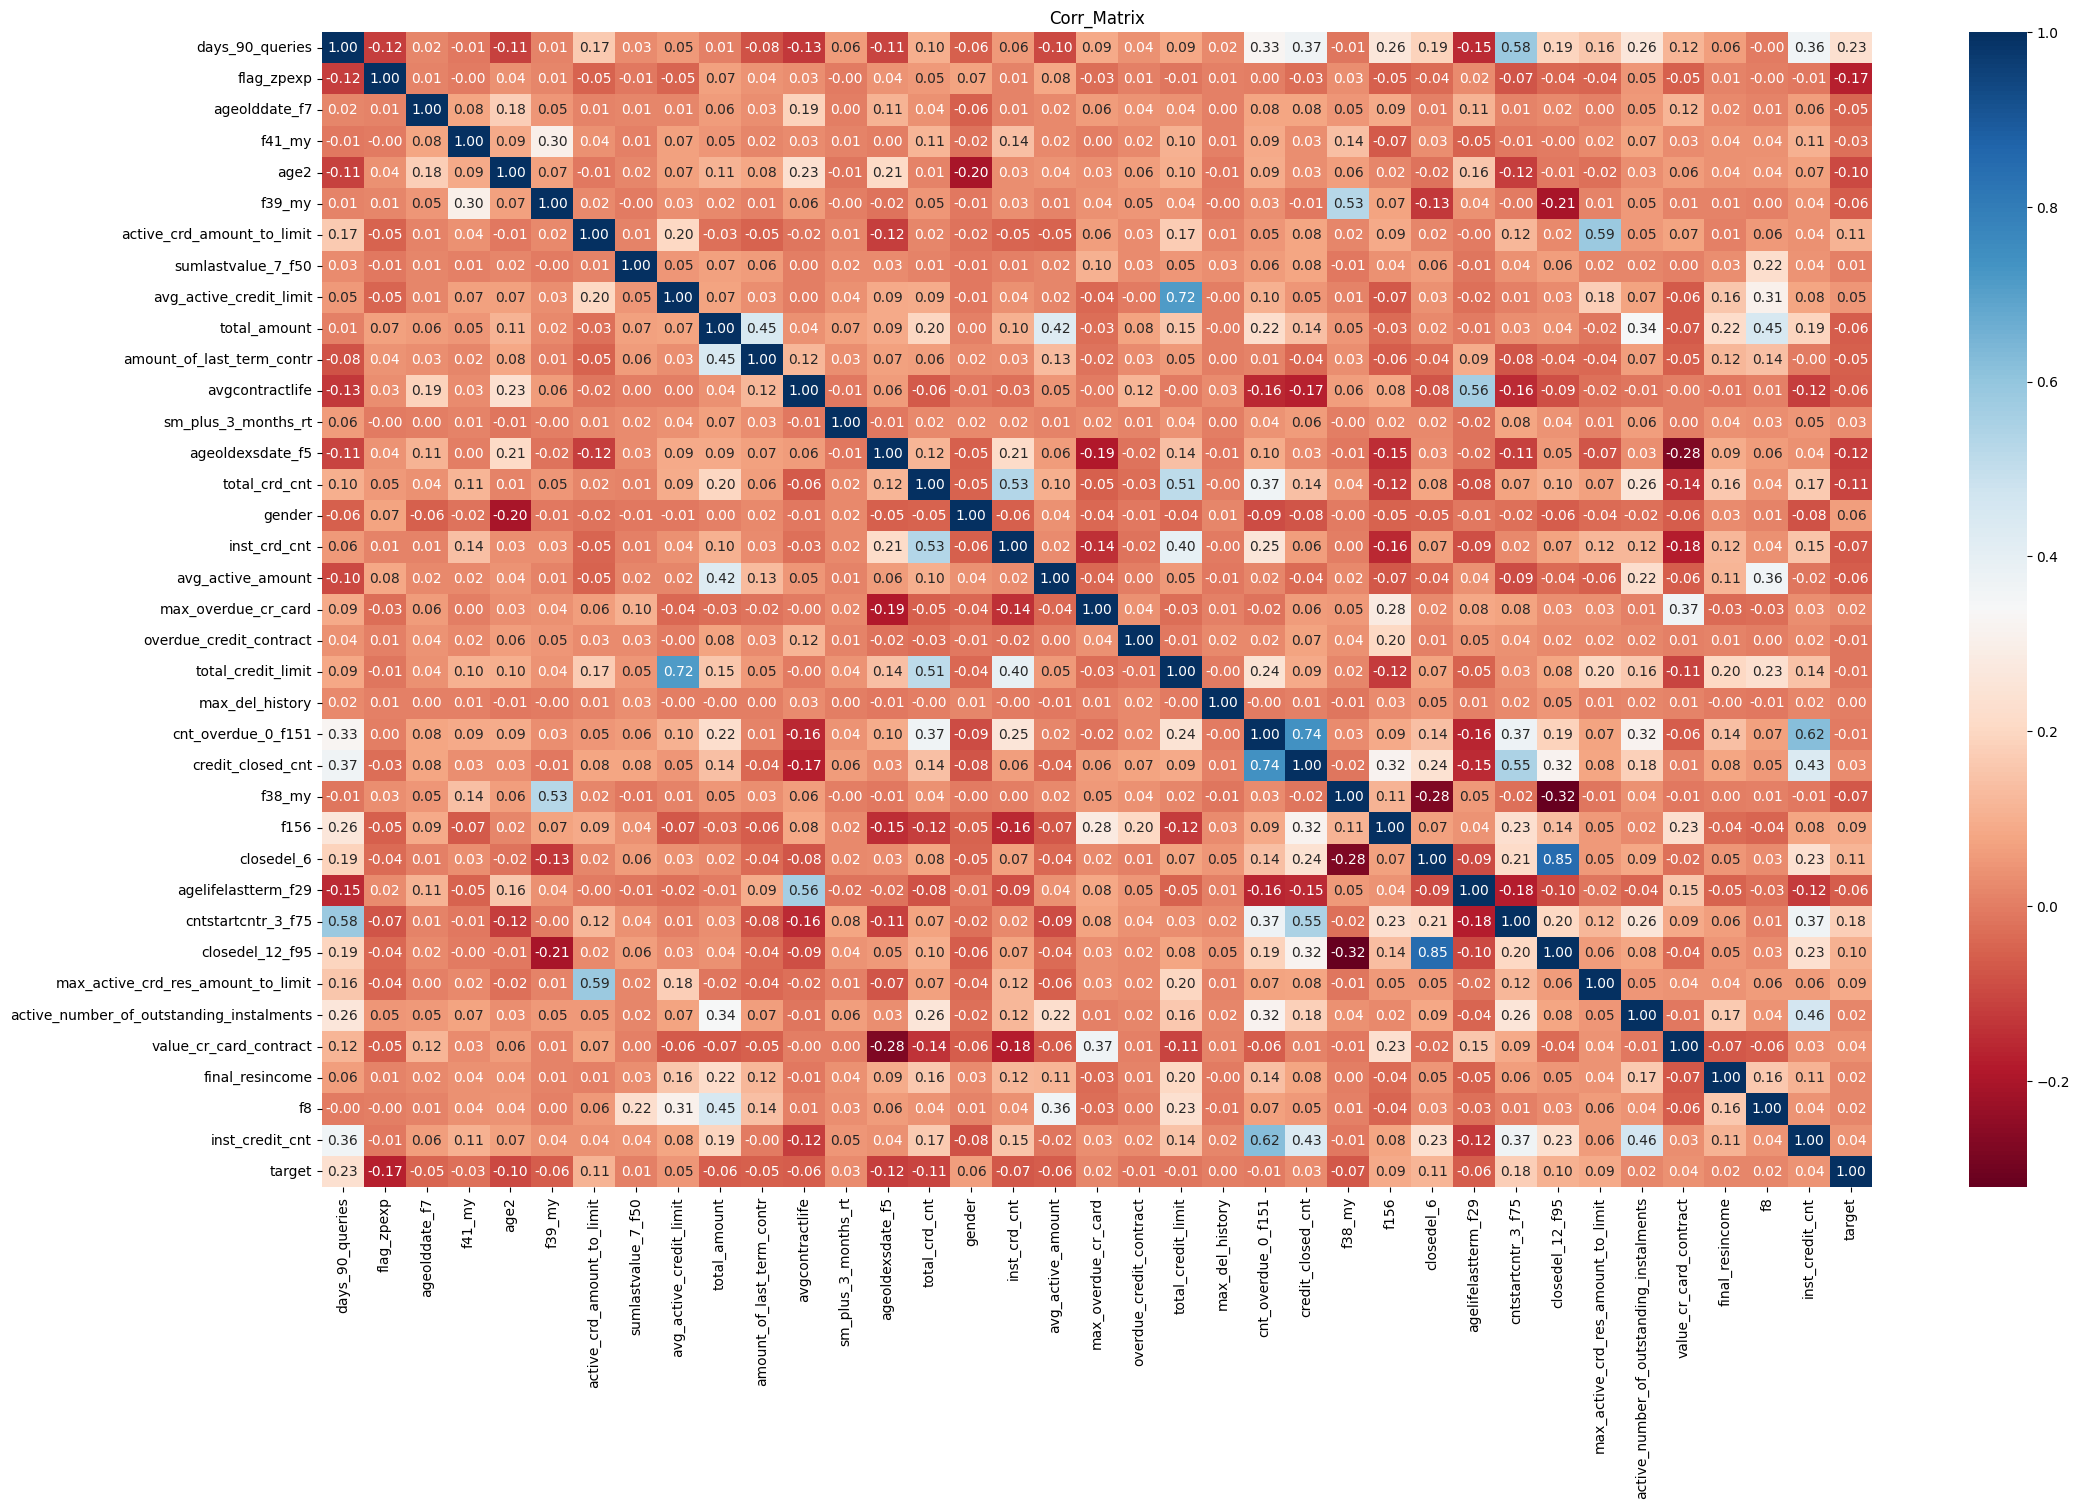

In [16]:
corr_matrix = train_df_filled.corr()
plt.figure(figsize=(25, 15))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu', fmt='.2f')
plt.title("Corr_Matrix")

## PCA abd Feature Selection

In [17]:
from sklearn.decomposition import PCA

In [18]:
# Selecting numerical features, excluding irrelevant columns
num_features = train_df_filled.select_dtypes(include=['float64', 'int64']).drop(columns=['flag_zpexp', 'gender', 'value_cr_card_contract', 'overdue_credit_contract', 'target'])

# Standardizing the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(num_features)

# Fitting PCA without specifying the number of components
pca_model = PCA()
pca_model.fit(normalized_data)

# Proportion of variance explained by each component
variance_explained = pca_model.explained_variance_ratio_

# Cumulative proportion of explained variance
cumulative_variance_explained = np.cumsum(variance_explained)

# Determining the number of components that explain at least 90% of the variance
num_components = np.argmax(cumulative_variance_explained >= 0.90) + 1

# Reapplying PCA with the selected number of components
pca_reduced = PCA(n_components=num_components)
principal_comps = pca_reduced.fit_transform(normalized_data)

# Importance of features for each principal component
importance_matrix = pd.DataFrame(pca_reduced.components_, columns=num_features.columns, index=[f'Component {i+1}' for i in range(num_components)])

# Display the matrix of component weights
print(importance_matrix)

# Finding the most influential features
significant_features = importance_matrix.abs().sum(axis=0).nlargest(num_components)
print(f"Top {num_components} Most Influential Features:\n", significant_features)

              days_90_queries  ageolddate_f7    f41_my      age2    f39_my  \
Component 1          0.274114       0.040617  0.067934  0.015590  0.001098   
Component 2         -0.218713       0.071713  0.125430  0.177837  0.130107   
Component 3          0.155961       0.133116  0.150752  0.090541  0.414818   
Component 4         -0.036277       0.141580 -0.072707  0.153865 -0.074644   
Component 5          0.015624       0.127161 -0.101345  0.128389 -0.152157   
Component 6          0.069597      -0.273396 -0.148971 -0.317957 -0.073295   
Component 7         -0.123890      -0.011893  0.395725  0.035251  0.371116   
Component 8         -0.016075       0.130274 -0.305052  0.240177 -0.196252   
Component 9         -0.098505       0.143413  0.217329  0.259210  0.077178   
Component 10        -0.117515       0.102265 -0.078086  0.040189 -0.100002   
Component 11         0.058215      -0.055148 -0.035201 -0.051891  0.015494   
Component 12        -0.020324       0.055531  0.049607  0.058208

In [19]:
influential_features = ['sumlastvalue_7_f50', 'age2', 'f156', 'max_overdue_cr_card', 'ageoldexsdate_f5', 'active_number_of_outstanding_instalments', 'inst_crd_cnt', 'agelifelastterm_f29', 'f8', 'avg_active_amount', 'amount_of_last_term_contr', 'total_crd_cnt', 'avg_active_credit_limit', 'credit_closed_cnt', 'avgcontractlife', 'sm_plus_3_months_rt']

In [20]:
new_dataset = train_df_filled[influential_features]

In [21]:
new_df = train_df_filled[influential_features + ['flag_zpexp', 'target']]

In [22]:
new_df

,sumlastvalue_7_f50,age2,f156,max_overdue_cr_card,ageoldexsdate_f5,active_number_of_outstanding_instalments,inst_crd_cnt,agelifelastterm_f29,f8,avg_active_amount,amount_of_last_term_contr,total_crd_cnt,avg_active_credit_limit,credit_closed_cnt,avgcontractlife,sm_plus_3_months_rt,flag_zpexp,target
0,6017.76,25.0,0.0,0.00,19.0,53.0,8.0,15.0,0.000000,3.807397e+05,86589.25,1.0,525000.0,2.0,15.000000,515535.00,0,0
1,25447.39,31.0,0.0,0.00,27.0,257.0,19.0,26.0,68881.260000,1.114239e+07,4682000.00,4.0,360000.0,8.0,9.375000,1007171.07,0,0
2,25447.39,22.0,0.0,0.00,32.0,17.0,18.0,2.0,7353.900000,1.700000e+05,98290.00,11.0,73384.0,6.0,1.666667,24400.00,0,0
3,25447.39,45.0,0.0,0.00,53.0,64.0,18.0,60.0,96547.400000,7.960000e+06,2000000.00,4.0,1081991.0,1.0,60.000000,9629760.00,0,0
4,25447.39,45.0,0.0,0.00,53.0,64.0,18.0,60.0,96547.400000,7.960000e+06,2000000.00,4.0,1081991.0,1.0,60.000000,9629760.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55707,11162.00,25.0,2.0,0.00,29.0,53.0,16.0,19.0,32377.333333,3.807397e+05,115880.00,0.0,525000.0,1.0,19.000000,14000.00,0,0
55708,41118.00,28.0,2.0,205950.56,29.0,53.0,16.0,17.0,32377.333333,3.807397e+05,35000.00,1.0,525000.0,1.0,17.000000,515535.00,0,1
55709,25447.39,32.0,4.0,74512.22,4.0,15.0,16.0,62.0,12478.000000,2.245900e+05,700000.00,1.0,525000.0,1.0,62.000000,515535.00,0,1
55710,25447.39,39.0,2.0,358808.57,2.0,23.0,3.0,0.0,922.315000,4.427100e+04,341190.00,2.0,200000.0,1.0,0.000000,48471.00,0,0


## Buildng ML Models

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [24]:
X = new_df.drop(columns=['target'])
y = new_df['target']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

LogisticRegression AUC: 0.7202017887897781
LogisticRegression Accuracy: 0.8084896347482725
LogisticRegression Precision: 0.45714285714285713
LogisticRegression Recall: 0.015037593984962405
LogisticRegression F1 Score: 0.029117379435850774
              precision    recall  f1-score   support

           0       0.81      1.00      0.89      9015
           1       0.46      0.02      0.03      2128

    accuracy                           0.81     11143
   macro avg       0.63      0.51      0.46     11143
weighted avg       0.74      0.81      0.73     11143



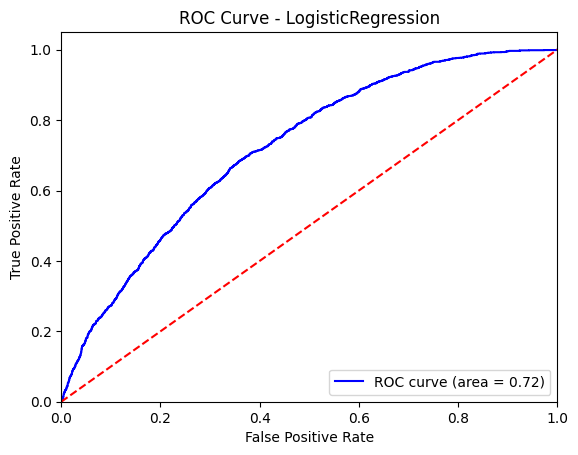

RandomForestClassifier AUC: 0.8987587521215685
RandomForestClassifier Accuracy: 0.8913219061294086
RandomForestClassifier Precision: 0.906832298136646
RandomForestClassifier Recall: 0.48026315789473684
RandomForestClassifier F1 Score: 0.6279569892473118
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      9015
           1       0.91      0.48      0.63      2128

    accuracy                           0.89     11143
   macro avg       0.90      0.73      0.78     11143
weighted avg       0.89      0.89      0.88     11143



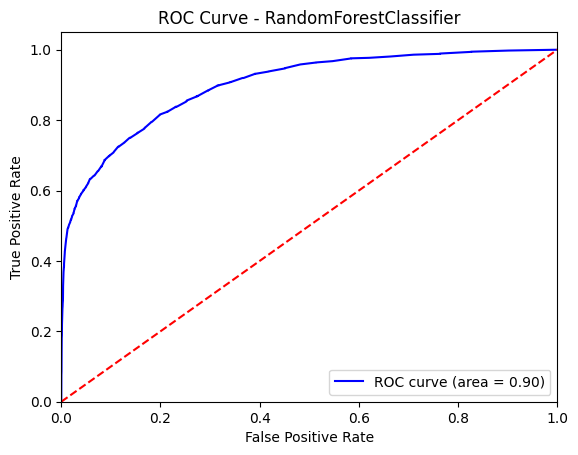

XGBClassifier AUC: 0.8572955892226406
XGBClassifier Accuracy: 0.8562326124024051
XGBClassifier Precision: 0.7548449612403101
XGBClassifier Recall: 0.36607142857142855
XGBClassifier F1 Score: 0.4930379746835443
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      9015
           1       0.75      0.37      0.49      2128

    accuracy                           0.86     11143
   macro avg       0.81      0.67      0.70     11143
weighted avg       0.85      0.86      0.84     11143



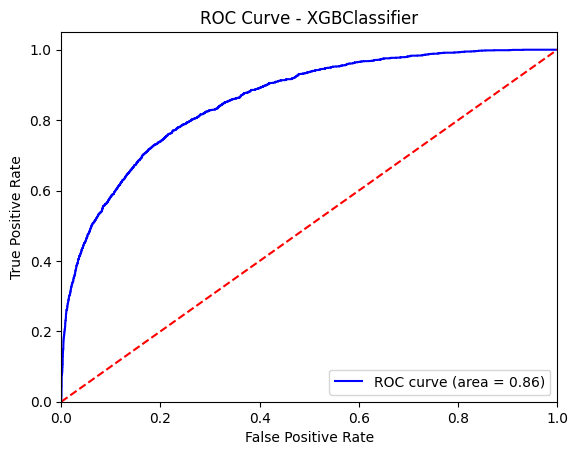

In [27]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def evaluate_model(model, X_train, y_train, X_test, y_test):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  y_proba = model.predict_proba(X_test)[:, 1]

  auc_score = roc_auc_score(y_test, y_proba)
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)

  print(f"{model.__class__.__name__} AUC: {auc_score}")
  print(f"{model.__class__.__name__} Accuracy: {accuracy}")
  print(f"{model.__class__.__name__} Precision: {precision}")
  print(f"{model.__class__.__name__} Recall: {recall}")
  print(f"{model.__class__.__name__} F1 Score: {f1}")
  print(classification_report(y_test, y_pred))

  # ROC-AUC Curve
  fpr, tpr, thresholds = roc_curve(y_test, y_proba)
  roc_auc = auc(fpr, tpr)

  plt.figure()
  plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
  plt.plot([0, 1], [0, 1], color='red', linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(f'ROC Curve - {model.__class__.__name__}')
  plt.legend(loc='lower right')
  plt.show()

# Logistic Regression
log_reg = LogisticRegression(random_state=42)
evaluate_model(log_reg, X_train_scaled, y_train, X_test_scaled, y_test)

# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
evaluate_model(rf_classifier, X_train, y_train, X_test, y_test)

# Gradient Boosting Classifier (XGBoost)
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
evaluate_model(xgb_classifier, X_train, y_train, X_test, y_test)

### Based on the graphs and results above, the Random Forest (RF) model showed the highest performance among the other models and is recommended for deployment in production.